In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#PCA
from sklearn.decomposition import PCA as sk_PCA
from sklearn.preprocessing import StandardScaler as SS

## Loading in data, exploring it and converting it.
trainDataNP = np.load("fashion_train.npy")
testDataNP = np.load("fashion_test.npy")

In [36]:
# class PCA:
#     def __init__(self, n_components):
#         self.n_components = n_components
#         self.components = None
#         self.mean = None
#         self.centered_data = None

#     def fit(self, X, y = None):
#         #Calculating mean of data
#         self.mean = np.mean(X, axis=0)
        
#         #centering
#         self.centered_data = X - self.mean

#         #Covariance Matrix
#         covar_matrix = np.cov(self.centered_data, rowvar=False)

#         #eigenvalues and eigenvectors
#         eigenvalues, eigenvectors = np.linalg.eigh(covar_matrix)

#         #sorting eigvalues and corresponding eigvectors in descending order
#         idx = np.argsort(eigenvalues)[::-1]
#         eigenvalues = eigenvalues[idx]
#         eigenvectors = eigenvectors[:, idx]

#         #top n components eigenvectors selected
#         self.components = eigenvectors[:, :self.n_components]

#     def transform(self, X):
#         projected_data = np.dot(self.centered_data, self.components)

#         return projected_data
    

In [37]:
X_train = trainDataNP[:, :-1]
y_train = trainDataNP[:, -1]
X_test = testDataNP[:, :-1]
y_test = testDataNP[:, -1]

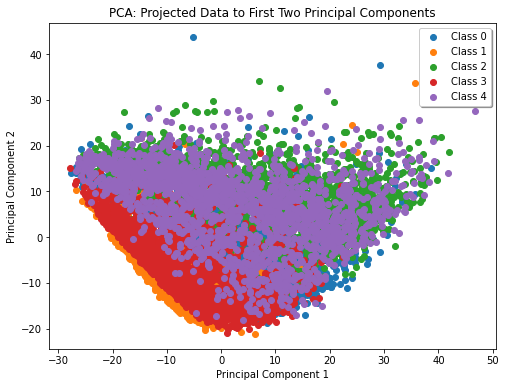

In [41]:
from sklearn.pipeline import Pipeline
sklearnPCA = sk_PCA()
scaler = SS()

pipeline = Pipeline([('scaling', scaler), ('pca', sk_PCA(n_components=2))])
pipe_X_train = pipeline.fit_transform(X_train)

sklearnPCA.fit(pipe_X_train, y_train)
sk_projected_data = sklearnPCA.transform(pipe_X_train)

plt.figure(figsize=(8, 6))

# Plot each class separately
for label in np.unique(y_train):
    indices = np.where(y_train == label)
    plt.scatter(sk_projected_data[indices, 0], sk_projected_data[indices, 1], label=f'Class {label}')

plt.title('PCA: Projected Data to First Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(shadow=True)
plt.show()